In [1]:
import pandas as pd
#고객이탈 데이터셋 로딩
df=pd.read_csv('D:\data\customer/customer.csv')
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
len(df.columns) #변수갯수

17

In [3]:
train_cols=df.columns[0:16] #0~15
X=df[train_cols] #독립변수
y=df['Churn'] #종속변수 (0 유지, 1이탈)

In [5]:
df['Churn'].value_counts() #0 유지 2850 1이탈 483

0    2850
1     483
Name: Churn, dtype: int64

In [6]:
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Churn'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [8]:
df2['Churn'].value_counts()

1    483
0    483
Name: Churn, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [39]:
from sklearn.tree import DecisionTreeClassifier
#의사결정나무 모형을 만들고 학습용 데이터셋으로 기계학습
model=DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
#예측정확도 확인
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용 

0.9291072768192048
0.9190404797601199


In [41]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #예측한 값
cm=confusion_matrix(y_test,pred) #실제값과 예측값 비교
cm

array([[569,   3],
       [ 51,  44]], dtype=int64)

In [42]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,569,3
1,51,44


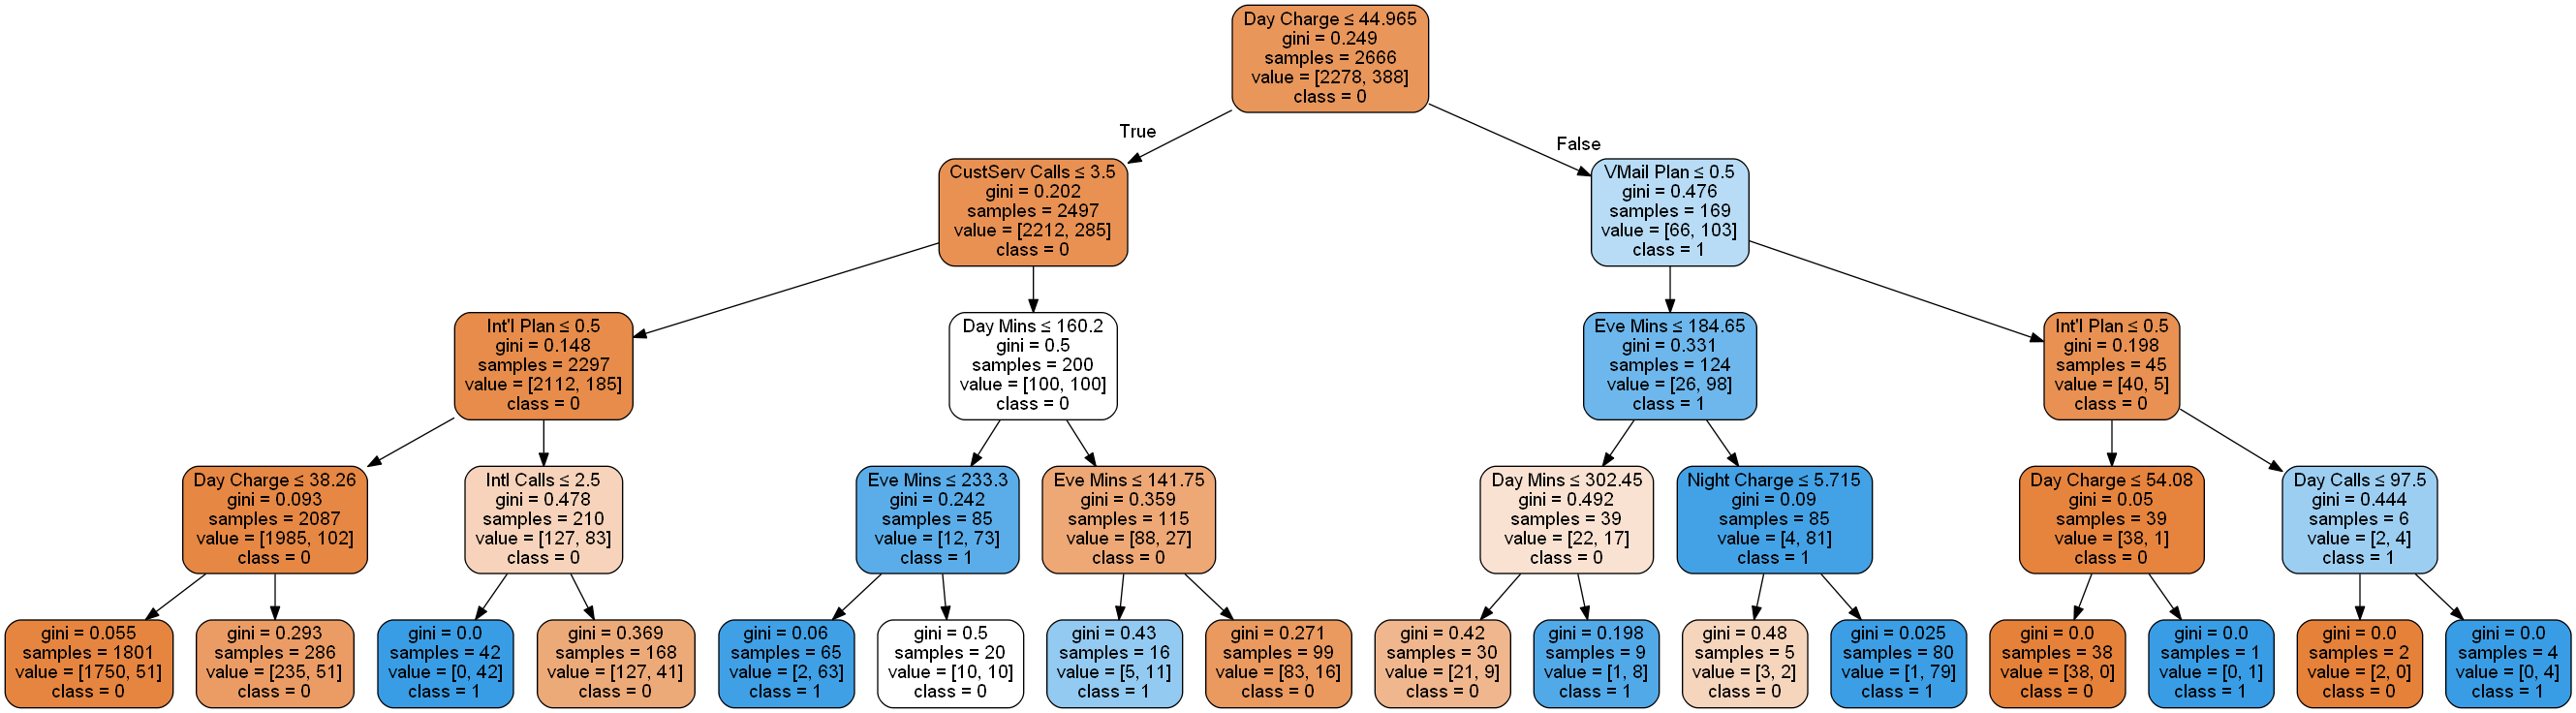

In [43]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
#트리 그래프
dot_data=export_graphviz(model,out_file=None,
                         feature_names=train_cols,class_names=['0','1'],filled=True,
                         rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

(3333, 16)
16
[0.11114587 0.         0.06764655 0.03105995 0.         0.28599251
 0.03187204 0.00775053 0.09358897 0.00947794 0.00105476 0.01194156
 0.11410478 0.08527393 0.00532929 0.14376132]


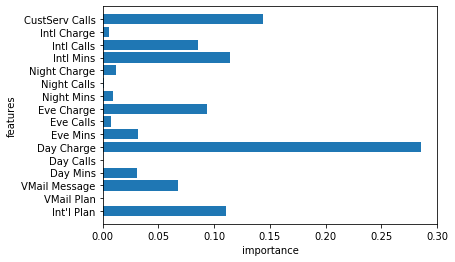

In [38]:
#특성의 중요도 그래프
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#feature_importances_ 변수의 중요도
def plot_tree(model):
    n_features=X.shape[1] #변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features),train_cols) #y축 눈금
    plt.xlabel('importance') #x축 제목
    plt.ylabel('features') #y축 제목
    plt.ylim(-1,n_features) #y축의 값의 범위
    
plot_tree(model)
#의사결정나무 모형을 만들기 위한 변수의 중요도

print(X.shape)
print(X.shape[1])
print(model.feature_importances_)

In [44]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 모형, 트리갯수 500, 최대질문단계 6
forest=RandomForestClassifier(n_estimators=500,random_state=10,max_depth=6)
forest.fit(X_train,y_train)
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.9632408102025506
0.9385307346326837


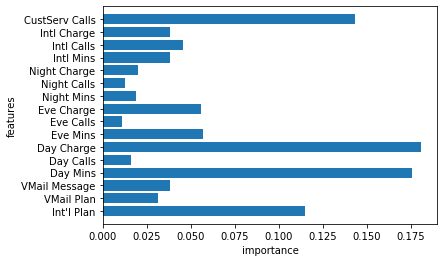

In [45]:
plot_tree(forest)